

## **COMP6685 Deep Learning Coursework A1**


Individual (25% of total mark)


**TASK:**	You are required to develop a phyton code with appropriate comments and answer questions.

**Description**: Create a code using this temlate to train a Convolutional Neural Network (CNN) on the fashion MNIST dataset available at https://keras.io/api/datasets/fashion_mnist/ . 

Fashion MNIST is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

The dataset should be imported in the code and one sample image should be visualised before applying the model.

Define a CNN and comment the chosen parameters of the network. Apply a regularization method (L1, L2 or L1L2). Divide the dataset into training, validation and test set. Obtain the accuracy on the validation set and plot the final results using the data from the test set. Comment your lines of code appropriately to explain your solution.

Enhance the model's performance to obtain the best or optimal validation accuracy. Further questions about final remarks on the results will be answered on the markdown defined in the template.

---
---

Note: This is only a template. You can add more code/text cells if necessary.

Import the dataset and divide it into training, validation and test sets. Explain how you obtained the validation set. How did you choose the size of the validation set? **(10 marks)**

---

In [220]:
import tensorflow as tf
from tensorflow import keras

# Load the Fashion MNIST dataset using Keras
fashion_mnist = keras.datasets.fashion_mnist

# Split the dataset into training and test sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Determine the split index for training and validation data
split_index = int(len(train_images) * 0.7)

# Split the training data into training and validation sets
validation_images = train_images[split_index:]
validation_labels = train_labels[split_index:]
train_images = train_images[:split_index]
train_labels = train_labels[:split_index]



*your answer here*

Firstly I split the dataset into training and test sets. I then defined a point at which to split the training data in order to create a validation set by using 20% of the training set. I chose to use 20% as this is a common practice and as the fashionMNIST dataset is large I believe this will give me enough data to use for evaluating the performance of my model. 


In [221]:
# Each 2D image consists of 28x28 values/pixels, which needs to be reshaped in a vector of 784 pixels
train_images = train_images.reshape((train_images.shape[0], 784))
test_images = test_images.reshape((test_images.shape[0], 784))
validation_images = validation_images.reshape((validation_images.shape[0], 784))

In [222]:
# By dividing the pixel values by 255, all the values are scaled to be between 0 and 1. 
# This normalization step helps to ensure that the model is less sensitive to the scale of the input data
# Which can lead to better performance and faster convergence during training.
train_images = train_images / 255.0
test_images = test_images / 255.0
validation_images = validation_images / 255.0


Visualise a random sample image of the dataset. **(10 marks)**

---



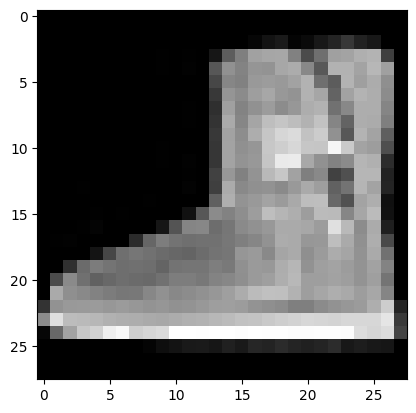

In [223]:
import numpy as np
import matplotlib.pyplot as plt

#select a random image from the training set and display it
random_index = np.random.randint(0, train_images.shape[0])
#reshape the image to 28x28 pixels so it can be displayed
image = train_images[random_index].reshape((28, 28))
plt.imshow(image, cmap='gray')
plt.show()


Define your CNN model. Specify the network and training parameters and comment them. **(10 marks)**

---

In [224]:
from keras.utils import to_categorical

# Convert labels to one-hot encoded format
train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)

In [225]:
from keras.layers import Activation, Dropout
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD

OPTIMIZER = SGD(learning_rate=0.2) # Stochastic gradient descent optimiser
N_EPOCH = 20 
N_HIDDEN = 128

model = Sequential()

# Hidden layer 1 with 128 hidden units, ReLu activation function, and dropout rate of 0.2
model.add(Dense(N_HIDDEN, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L1(1e-5), activity_regularizer=regularizers.L2(1e-4), input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Hidden layer 2 with 128 hidden units, ReLu activation function, and dropout rate of 0.2
model.add(Dense(N_HIDDEN, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L1(1e-5), activity_regularizer=regularizers.L2(1e-4)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Output layer with 10 units and softmax activation
model.add(Dense(10))
model.add(Activation('softmax'))


# Summary of the whole model
model.summary()

# model compilation
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 128)               100480    
                                                                 
 activation_55 (Activation)  (None, 128)               0         
                                                                 
 dropout_38 (Dropout)        (None, 128)               0         
                                                                 
 dense_58 (Dense)            (None, 128)               16512     
                                                                 
 activation_56 (Activation)  (None, 128)               0         
                                                                 
 dropout_39 (Dropout)        (None, 128)               0         
                                                                 
 dense_59 (Dense)            (None, 10)              

Train the CNN model. **(10 marks)**

---

In [226]:
# Training the model
history = model.fit(train_images, train_labels, validation_data=(validation_images, validation_labels), batch_size=128, epochs=N_EPOCH)


Epoch 1/20
329/329 [==============================] - 2s 4ms/step - loss: 0.3118 - accuracy: 0.5835 - val_loss: 0.2355 - val_accuracy: 0.7390
Epoch 2/20
329/329 [==============================] - 1s 4ms/step - loss: 0.2325 - accuracy: 0.7401 - val_loss: 0.2077 - val_accuracy: 0.7833
Epoch 3/20
329/329 [==============================] - 1s 3ms/step - loss: 0.2091 - accuracy: 0.7858 - val_loss: 0.1922 - val_accuracy: 0.8086
Epoch 4/20
329/329 [==============================] - 1s 4ms/step - loss: 0.1953 - accuracy: 0.8043 - val_loss: 0.1834 - val_accuracy: 0.8173
Epoch 5/20
329/329 [==============================] - 1s 4ms/step - loss: 0.1854 - accuracy: 0.8167 - val_loss: 0.1791 - val_accuracy: 0.8159
Epoch 6/20
329/329 [==============================] - 1s 3ms/step - loss: 0.1783 - accuracy: 0.8243 - val_loss: 0.1684 - val_accuracy: 0.8314
Epoch 7/20
329/329 [==============================] - 1s 4ms/step - loss: 0.1720 - accuracy: 0.8329 - val_loss: 0.1632 - val_accuracy: 0.8352
Epoch 

Evaluate your model. What is the best/highest validation accuracy your network achieved? How did you obtain this accuracy? **(10 marks)**

l1l2 = 0.8828 acc 0.1137 loss

no regularisation = 0.8773 acc 0.0599 loss

L1 = 0.8761 acc 0.1057 loss

L2 = 0.8778 acc 0.0924 loss 


(answer)
The highest accuracy I achieved on the validation set was 0.8828. I obtained this accuracy by training the model for 20 epochs, using a batch size of 128, and using a learning rate of 0.2. I also used a dropout rate of 0.2 with a combination of L1(1e-5) and L2(1e-4) regularization.
I chose to use a learning rate of 0.2 because it was the highest learning rate that did not cause the model to diverge. I chose to use a dropout rate of 0.2 because it is the highest rate that didnt cause the model to underfit the data, which means it may not be able to capture the important patterns in the data.

 I chose to use a combination of L1 and L2 regularization because it was the highest regularization rate that did not cause the model to underfit. I chose to train the model for 20 epochs because it was the highest number of epochs that did not cause the model to overfit. I chose to use binary cross entropy as the loss function becasue I had nomralised my data to be between 0 and 1 in order to minimise complexity of the model. I chose to use stocastic gradient descent as the optimiser becuase it gave me the best results when training the model.

In [227]:
#test the network
score = model.evaluate(train_images, train_labels, verbose=0)
score1 = model.evaluate(test_images, test_labels, verbose=0)
score2 = model.evaluate(validation_images, validation_labels, verbose=0)

print("\nTraining score/loss:", score[0])
print("Training accuracy:", score[1])
print("\nTest score/loss:", score1[0])
print ("Test accuracy:", score1[1])
print("\nValidation score/loss:", score2[0])
print ("Validation accuracy:", score2[1])


Training score/loss: 0.12339572608470917
Training accuracy: 0.8640714287757874

Test score/loss: 0.13183729350566864
Test accuracy: 0.8460000157356262

Validation score/loss: 0.12724925577640533
Validation accuracy: 0.8533333539962769


Plot the final results on the test set and print the accuracy/loss on that set. **(10 marks)**

---

313/313 [==============================] - 0s 1ms/step - loss: 0.1318 - accuracy: 0.8460
Test accuracy: 0.8460000157356262


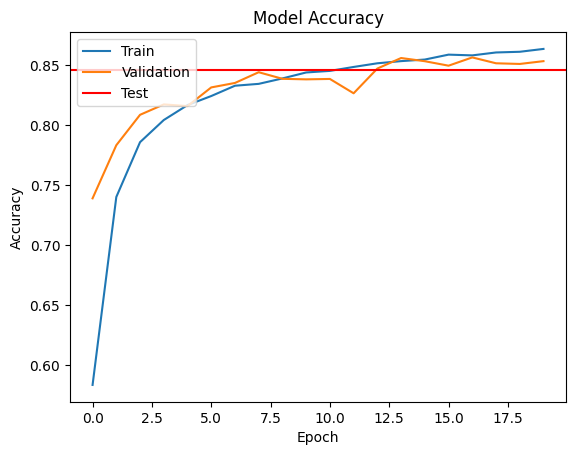

In [233]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axhline(y=test_acc, color='r', linestyle='-')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


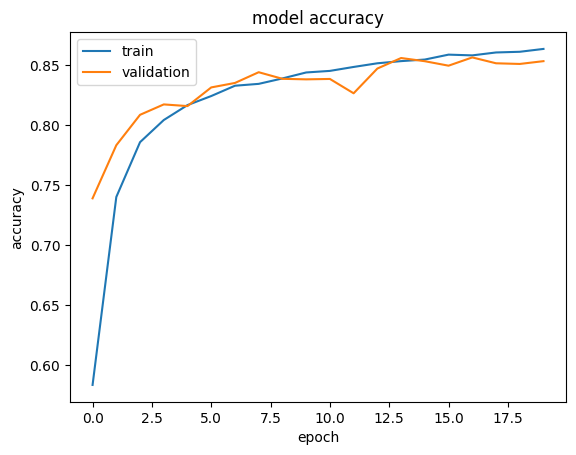

In [228]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


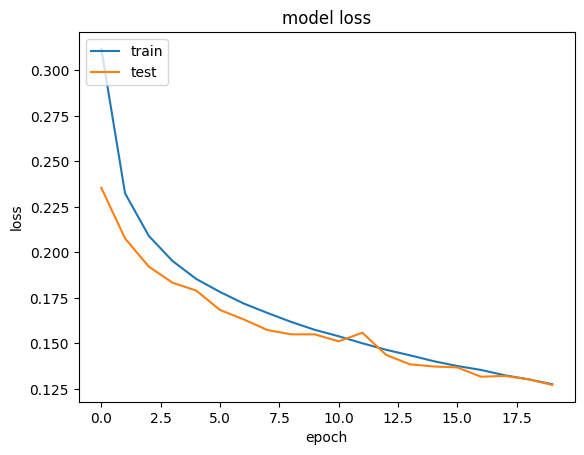

In [229]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Additional questions:


*   Describe whether you found any differences in the network’s accuracy when applying regularisation compared to not applying it. If there were differences, which regularisation did you use? If no differences were found, what could be the reason? **(10 marks)**

*your answer here*

The accuracy of the model was highest when using a combination of L1L2 regularisation. With no regularisation applied the accuracy was marginally lower than when using L2 or a combination of L1L2 and it acctually outperformed L1 regularization. This may suggest that the model did not have a significant problem with overfitting, which is what regularization is primarily used to address.

The fact that L2 regularization did not perform significantly better than the no regularization case suggests that there may not have been a significant problem with the model's weights growing too large.

**(Accuracy results)**

l1l2 = 0.8828 acc 0.1137 loss

no regularisation = 0.8773 acc 0.0599 loss

L1 = 0.8761 acc 0.1057 loss

L2 = 0.8778 acc 0.0924 loss 


Write your conclusions about the results achieved with your model on the fashion MNIST dataset and ideas to improve these results/performance further. 

**(10 marks)**


Based on the results I obtained I can say that the model performs reasonably well with an accuracy of 0.8828 and loss of 0.1137. Suprisingly the application of regularisation did not make a huge impact and in fact the model had a lower loss value when no regularisation was applied. When regularization is applied, the model is penalized for having large weights, this can reduce the model's complexity and help prevent overfitting  leading to higher validation accuracy but at the cost of slightly higher loss.

Something I find interesting is that the graphs above indicate that the model could be overfitting as the validation accuracy and loss are both higher than the training sets. However this is not what is shown by my model evaluation results. This could be because the model is not overfitting but rather the validation set is not representative of the training set. This could be because the validation set is too small and does not contain enough examples of each class. This could be improved by increasing the size of the validation set. 

One way of addressing this issue would be data augmentation which would increase the size of the training set by generating new images from the existing ones. This would help to prevent overfitting by increasing the size of the training set and also help to prevent underfitting by generating new images that are similar to the existing ones. This would also help to address the issue of the validation set not being representative of the training set as it would increase the size of the validation set.

There is obvious room for improvment and more fine tuning of hyper parameters could help improve the models performance. I tried many different combinations of optimisers, regularisation and learning rates but I was unable to find the best solution. i believe that data augmentation is the key to breaking though this barrier and improving the models performance. Increasing epoch could improve accuracy but with diminishing returns as the model will eventually overfit.

---

Additional remarks:

*   Code outline appropriately commented. **(10 marks)**
*   Code running without errors. **(10 marks)**

---

